In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 99

Read a sample of the dataset and look at the memory usage. PLaying around, we find 3000 rows for a sample is still below 5MB memory (the cutoff we'll be using for this exercise).

In [2]:
df = pd.read_csv('loans_2007.csv',nrows=3000)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 52 columns):
id                            3000 non-null int64
member_id                     3000 non-null float64
loan_amnt                     3000 non-null float64
funded_amnt                   3000 non-null float64
funded_amnt_inv               3000 non-null float64
term                          3000 non-null object
int_rate                      3000 non-null object
installment                   3000 non-null float64
grade                         3000 non-null object
sub_grade                     3000 non-null object
emp_title                     2829 non-null object
emp_length                    3000 non-null object
home_ownership                3000 non-null object
annual_inc                    3000 non-null float64
verification_status           3000 non-null object
issue_d                       3000 non-null object
loan_status                   3000 non-null object
pymnt_plan           

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


The biggest possible savings are typically on object (string) columns, so we'll start there. Converting columns that are less than 50% unique to categorical datatypes is a great start.

In [5]:
# create list of object columns where number of unique values
# divided by total rows is less than 0.5
cat_cols = []
for col in df.select_dtypes(include=['object']).columns:
    if len(df[col].unique()) / len(df) < 0.5:
        cat_cols.append(col)
        
cat_cols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [6]:
df[cat_cols].head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,Jan-1985,83.7%,f,Jan-2015,Jun-2016,INDIVIDUAL
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,Apr-1999,9.4%,f,Apr-2013,Sep-2013,INDIVIDUAL
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,Nov-2001,98.5%,f,Jun-2014,Jun-2016,INDIVIDUAL
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,Feb-1996,21%,f,Jan-2015,Apr-2016,INDIVIDUAL
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,Jan-1996,53.9%,f,Jun-2016,Jun-2016,INDIVIDUAL


In [7]:
df['int_rate'].unique()

array([' 10.65%', ' 15.27%', ' 15.96%', ' 13.49%', ' 12.69%', '  7.90%',
       ' 18.64%', ' 21.28%', ' 14.65%', '  9.91%', ' 16.29%', '  6.03%',
       ' 11.71%', ' 12.42%', ' 14.27%', ' 16.77%', '  7.51%', '  8.90%',
       ' 18.25%', '  6.62%', ' 19.91%', ' 17.27%', ' 17.58%', ' 21.67%',
       ' 19.42%', ' 22.06%', ' 20.89%', ' 20.30%', ' 23.91%', ' 19.03%',
       ' 23.52%', ' 23.13%', ' 22.74%', ' 22.35%', ' 24.11%', '  6.00%'], dtype=object)

In [8]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [9]:
df['revol_util'].unique()

array(['83.7%', '9.4%', '98.5%', '21%', '53.9%', '28.3%', '85.6%', '87.5%',
       '32.6%', '36.5%', '20.6%', '67.1%', '91.7%', '43.1%', '55.5%',
       '81.5%', '70.2%', '16%', '37.73%', '23.1%', '90.3%', '82.4%',
       '91.8%', '29.7%', '93.9%', '57.6%', '59.5%', '37.7%', '59.1%',
       '86.9%', '27.4%', '63.6%', '29.3%', '60.5%', '57.2%', '13.3%',
       '50.4%', '66.5%', '50%', '18.1%', '98.1%', '99%', '32.5%', '13.4%',
       '62.1%', '52.3%', '19.5%', '36.4%', '63.7%', '62%', '92.9%',
       '90.8%', '52.1%', '97.6%', '75.1%', '72.7%', '91.2%', '58.9%',
       '57.4%', '66.9%', '30.1%', '45.9%', '70.8%', '83.4%', '73.9%',
       '79.5%', '79.4%', '67.5%', '83.2%', '97%', '55%', '78.5%', '65%',
       '6.7%', '77.8%', '53.3%', '81.3%', '74.8%', '13.9%', '82.3%',
       '78.7%', '78.3%', '96.4%', '27.6%', '78.4%', '78.1%', '88.4%',
       '51.2%', '52.4%', '89.7%', '46.3%', '86.1%', '47.7%', '87.1%',
       '36.8%', '79.6%', '79.7%', '55.2%', '83.8%', '91.5%', '82.9%',
       '21

Term, int_rate and revol_util can be converted to numeric formats if we remove some of the unncessary characters, so we can drop those from the cat_cols list.

In [10]:
cat_cols.remove('term')
cat_cols.remove('int_rate')
cat_cols.remove('revol_util')

In [17]:
# we'll parse the following as date columns
date_cols = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

# Baselines

Let's get some baseline measures of memory footprint across all chunks prior to any cleaning or manipulation.

In [12]:
chunk_iter = pd.read_csv('loans_2007.csv',chunksize=3000)

chunk_count = 0
mem_usage_MBs = []

for c in chunk_iter:
    chunk_count += 1
    mem_usage_MBs.append(c.memory_usage(deep=True).sum() / 2**20)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  14.]),
 array([ 0.88080883,  1.28251247,  1.68421612,  2.08591976,  2.48762341,
         2.88932705,  3.29103069,  3.69273434,  4.09443798,  4.49614162,
         4.89784527]),
 <a list of 10 Patch objects>)

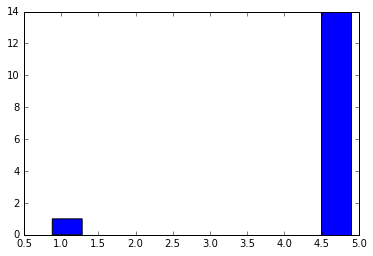

In [13]:
plt.hist(mem_usage_MBs)

In [14]:
print('Total memory across chunks: ',sum(mem_usage_MBs))
print('Total number of chunks: ',chunk_count)

Total memory across chunks:  66.2451467514
Total number of chunks:  15


# Applying type conversions

In [23]:
dtype_dict = {}
for c in cat_cols:
    dtype_dict[c] = 'category'
dtype_dict['id'] = 'object'

# read in with certain columns defined as categories
chunk_iter = pd.read_csv('loans_2007.csv',chunksize=3000,dtype=dtype_dict,parse_dates=date_cols)

chunk_count = 0
mem_usage_MBs = []

def strip_chars(instr):
    try:
        return instr.strip('%months')
    except:
        return instr
    
for c in chunk_iter:
    
    # clean and convert term and int_rate
    c['int_rate'] = c['int_rate'].apply(strip_chars)
    c['term'] = c['term'].apply(strip_chars)
    c['revol_util'] = c['revol_util'].apply(strip_chars)
    
    c['int_rate'] = c['int_rate'].astype('float')
    c['term'] = c['term'].astype('float')
    c['revol_util'] = c['revol_util'].astype('float')
    
    # downcast numeric fields with no nulls
    
    for col in c.select_dtypes(include=['float']):
        c[col] = pd.to_numeric(c[col],downcast='float')
    
    chunk_count += 1
    mem_usage_MBs.append(c.memory_usage(deep=True).sum() / 2**20)

In [29]:
# categorical only result
print(sum(mem_usage_MBs))

23.2011966705


In [71]:
# including float conversion for term and int_rate
print(sum(mem_usage_MBs))

20.0295066833


In [20]:
# including date conversion - interestingly this is worse than leaving them as category variables
print(sum(mem_usage_MBs))

20.6512937546


In [24]:
# downcast floats
print(sum(mem_usage_MBs))

15.2963972092
